## (10 points)  Q1) Implementing Dijkstra's algorithm in Python 

Read and learn how Dijkstra's SSSP algorithm works   
Implement the algorithm in Python including your own test driver to prove your implementation (You can use any simple graph for testing).  
Feel free to get help from any sources but make sure that you fully understand how the algorithm works and also show the source of your references.  
Then modify your code to display the entire history of the relaxation process.  
You may refer to slides 20 and 21 of class lecture 16 for the expected output.  
Also note that you need to cover at least the following 4 cases (sample example: slide 20)  
Relaxed: vertex[B]: OLD: Infinity, NEW: 4, Paths: {'B': 'A’}  
No edge relaxation is needed for the edge, D  
No un-visited outgoing edges from this node, D  
Then finally display the final results  

In [ ]:
#https://gist.github.com/econchick/4666413
#code from the slide referenced + commented code that apparently shortens it 
#kept here for reference, not using since it uses a class  

from collections import defaultdict

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.distances[(from_node, to_node)] = distance


    def dijkstra(graph, initial):
        visited = {initial: 0}
        path = defaultdict(list)

    nodes = set(graph.nodes)

    while nodes: 
            min_node = None
            for node in nodes:
                if node in visited:
                    if min_node is None:
                        min_node = node
                    elif visited[node] < visited[min_node]:
                        min_node = node

            if min_node is None:
                break

            nodes.remove(min_node)
            current_weight = visited[min_node]

            for edge in graph.edges[min_node]:
                weight = current_weight + graph.distances[(min_node, edge)]
                if edge not in visited or weight < visited[edge]:
                        visited[edge] = weight
                        path[edge].append(min_node)

    #return path

def main():
    g = Graph()
    g.add_node('a')
    g.add_node('b')
    g.add_edge('a', 'b', 10)
    
main()    


#https://gist.github.com/zaz/61cab8fbd02351d3047e 
#was a suggestion commented by the one that was presented in class, keeping it here for reference  

from collections import defaultdict

class Digraph(object):
    def __init__(self, nodes=[]):
        self.nodes = set()
        self.neighbours = defaultdict(set)
        self.dist = {}

    def addNode(self, *nodes):
        [self.nodes.add(n) for n in nodes]

    def addEdge(self, frm, to, d=1e309):
        self.addNode(frm, to)
        self.neighbours[frm].add(to)
        self.dist[ frm, to ] = d

    def dijkstra(self, start, maxD=1e309):
        """Returns a map of nodes to distance from start and a map of nodes to
        the neighbouring node that is closest to start."""
        # total distance from origin
        tdist = defaultdict(lambda: 1e309)
        tdist[start] = 0
        # neighbour that is nearest to the origin
        preceding_node = {}
        unvisited = self.nodes

        while unvisited:
            current = unvisited.intersection(tdist.keys())
            if not current: break
            min_node = min(current, key=tdist.get)
            unvisited.remove(min_node)

            for neighbour in self.neighbours[min_node]:
                d = tdist[min_node] + self.dist[min_node, neighbour]
                if tdist[neighbour] > d and maxD >= d:
                    tdist[neighbour] = d
                    preceding_node[neighbour] = min_node

        return tdist, preceding_node

    def min_path(self, start, end, maxD=1e309):
        """Returns the minimum distance and path from start to end."""
        tdist, preceding_node = self.dijkstra(start, maxD)
        dist = tdist[end]
        backpath = [end]
        try:
            while end != start:
                end = preceding_node[end]
                backpath.append(end)
            path = list(reversed(backpath))
        except KeyError:
            path = None

        return dist, path

    def dist_to(self, *args): return self.min_path(*args)[0]
    def path_to(self, *args): return self.min_path(*args)[1]

def main():
    graph = Digraph(nodes = ['A','B','C','D','E','F','G'])
    graph.addEdge("A", "B", 7)
    graph.addEdge("A", "D", 5)
    graph.addEdge("B", "C", 8)

    print(graph.min_path("A","D"))

if __name__ == "__main__":
    main()   

In [35]:
#https://www.youtube.com/watch?v=Ub4-nG09PFw&ab_channel=AmitabhaDey
#one that I'm working on 




def dijkstra(graph,start,goal):
    #records the cost to reach the node. Going to be updated as we move along 
    shortestDistance = {} 
    
    #keep track of node path 
    trackPredecessor = {}
    
    #need to iterate through all graph so we can have foresight of what we can do
    unseenNode = graph
    
    #largest number than all the edges
    infinity = 99999
    
    #empty list to trace back and see our path to find optimal route
    trackPath = []
    
    for node in unseenNode:
        shortestDistance[node] = infinity #end path can be whatever number
    shortestDistance[start] = 0 #start has to be at 0 
    
    
    #need to iterate through graph
    while unseenNode:
        minNode = None 
        
        for node in unseenNode:
            if minNode is None:
                minNode = node #starting the minimum distance also at 0
            
            elif shortestDistance[node] < shortestDistance[minNode]:
                #swap the numbers
                minNode = node 
                #as you are traversing node if the minNode is lower, then we move pointer 
                #traverse through graph, we need to determine mean distance node. If shortest distance of min distance node
                #is smaller than shortest distance to reach the distance
                #if its smaller, then we swap, we do this so we can move the pointer forward and help determines lower cost
                
            #path options from the node. ie "a" has 3 paths {"b":3, "c":4, "d":7}
            pathOptions = graph[minNode].items()
        #print("Path options are: ", pathOptions)
                
        #how to update costs of node 
        #is relaxation here? since we're evaluating the weights in the path
        #this also fixes the shortest path problem since it realizes that going from A-B-C costs the same as A-C
        for childNode, weight in pathOptions:
                #if total of weight + shorest distance to min distance is less than the distance to child node
            if weight + shortestDistance[minNode] < shortestDistance[childNode]:
                #the more efficient route is found 
                shortestDistance[childNode] = weight + shortestDistance[minNode]
                #track the path that has been taken
                trackPredecessor[childNode] = minNode
                
                
        #Relaxed: vertex[B]: OLD: Infinity, NEW: 4, Paths: {'B': 'A’}
        #print("All convolulted Paths:" , shortestDistance) # shortest distance also calculates relaxation, when does that happen
        #print("All distance Paths:" , shortestDistance)
        #No edge relaxation is needed for the edge, D
        #No un-visited outgoing edges from this node, D
        #Then finally display the final results
        
                    
            #need to remove it from the iteration to keep track of nodes that we have visited/ no backtracking 
        unseenNode.pop(minNode)
            
    #trace 
    currentNode = goal
    
    while currentNode != start:
        #trace back until you find start. start does not have predecessor 
        #if path is possible
        try:
        #if shortestDistance[currentNode] != []:
            trackPath.insert(0, currentNode)
            print("Node", currentNode, "is added to visited. Weight:", shortestDistance[currentNode])
            currentNode = trackPredecessor[currentNode]
            
        except KeyError: 
            #if no path
            print("Path is not possible")
            break
        
    
    #setting up the start node in the list
    trackPath.insert(0,start)
    
    #we did not reach the end goal if not infinity
    if shortestDistance[goal] != infinity:
        print("\n\nShortest distance in forward order is ", str(shortestDistance[goal]))
        #print("The shortest distance is ", goal, ":", start)
        print("Optimal path in forward order is ", str(trackPath))
    else:
        print("Path cannot be possible")
        
        
    
def main():
    
    #each node and its connected edges 
    graph = {
    "a": {"b":3, "c":4, "d":7}, #so node a is connected to b, c and d, with each weight connected to its path 
    "b": {"c":1, "f":5},
    "c": {"f":6, "d":2},
    "d": {"e":3, "g":6},
    "e": {"g":3, "h":4},
    "f": {"e":1, "h":8},
    "g": {"h":2},
    "h": {"g":2}
    }

    print("\nGraph that we are working with\n")
    print(" A-----7-----D-----6-----G ")
    print(" | \        /  \       / | ") 
    print(" |   4     2    3    3   | ") 
    print(" |     \  /      \  /    | ") 
    print(" 3      C          E     2 ") 
    print(" |     /  \      /   \   | ") 
    print(" |    1    6    1     4  | ") 
    print(" |  /       \  /       \ | ") 
    print(" B-----5-----F-----8-----H ")        
      
    print("\n\n")
    
    
    #for some reason, it wont let you print out the results as one, you have to uncomment them 
    print("\n\nWhole path")
    dijkstra(graph,"a","h")
    
    print("\n\nStarting at A to B")
    #dijkstra(graph,"a","b")
    
    print("No relaxation at D")
    #dijkstra(graph, "a", "d")
    
    print("No unvisited outgoing edge from D")
    #dijkstra(graph, "a", "e")
    
    

main()    


Graph that we are working with

 A-----7-----D-----6-----G 
 | \        /  \       / | 
 |   4     2    3    3   | 
 |     \  /      \  /    | 
 3      C          E     2 
 |     /  \      /   \   | 
 |    1    6    1     4  | 
 |  /       \  /       \ | 
 B-----5-----F-----8-----H 





Whole path
Node h is added to visited. Weight: 13
Node e is added to visited. Weight: 9
Node d is added to visited. Weight: 6
Node c is added to visited. Weight: 4


Shortest distance in forward order is  13
Optimal path in forward order is  ['a', 'c', 'd', 'e', 'h']


Starting at A to B
No relaxation at D
No unvisited outgoing edge from D


## (15 points) Q2: The least number of changes

Write a Python program to give changes for the least number of bills and coins.  

Assume the denominations are $100, $50, $20, $10, $5, $1, 50¢, 25¢, 10¢, 5¢, and 1¢. And, there are enough of each to make any required change. How would you represent $269.63?    Show your reasoning as well.  
Specify a change in the conditions above that make this greedy algorithm fail.  Also, show an example that demonstrates the failure.  
You implement either of two tasks specified below:  
Write another Python program to count the total number of ways to give change for any specified amount.  
Write another Python program solving the failure case you mentioned above. (perhaps solving it by a DP algorithm)   

In [16]:
def changeAmount(dollarAmount):

    hundreds = 0
    fifty = 0
    twenty = 0
    tens = 0
    fives = 0
    ones = 0
    rareCoin = 0 #fiddy cent 
    quarters = 0
    dimes = 0
    nickles = 0
    pennies = 0

    if dollarAmount <= 0:

        print('no change')

    else:
        # dividing numbers down from the amount entered 
        hundreds = dollarAmount//100 # taking the floor division to get the number of bills
        dollarAmount %= 100 #saving the remainder after removing the hundreds amount 
        
        fifty = (dollarAmount)// 50
        dollarAmount %= 50
        
        twenty = dollarAmount //20
        dollarAmount %=20
        
        tens = dollarAmount // 10
        dollarAmount %=10
        
        fives = dollarAmount // 5
        dollarAmount %= 5

        ones = dollarAmount // 1
        dollarAmount %= 1
        
        #breaking down the change here
        rareCoin = dollarAmount // 0.5
        dollarAmount %= .5
        

        quarters = dollarAmount // .25
        dollarAmount %= .25
    

        dimes = dollarAmount // .10
        dollarAmount %= .10
        

        nickles = dollarAmount // .05
        dollarAmount %= .05
        

        pennies = dollarAmount


    print("\nNumber of hundreds: ", hundreds, "Number of fifties: ", fifty, "Number of twenties: ", twenty , 
          "Number of tens: ", tens, "Number of fives: ", fives, "Number of ones: ", ones, "Number of 50 cents: ", rareCoin,
          "Number of quarters: ",  quarters, "Number of dimes: ",  dimes , "Number of nickles: ", nickles, 
          "Number of pennies: ", round(pennies,2))
    
    
def fail(dollarAmount):
    
    print("\nI thought this program that I wrote was really simple")
    print("\nI don't see a condition where this program would fail. Since I am breaking down the change as I go down " )
    print("only way that it could fail is if the order is wrong, like instead of hundreds, fifties ")
    print("it goes fifties then hundreds or start with ones then fives etc") 
    print("Another way it could fail is if there was a new demonination, like a $7 bill or .30 cent ")
    hundreds = 0
    fifty = 0
    twenty = 0
    tens = 0
    sevens = 0
    fives = 0
    ones = 0
    rareCoin = 0 #fiddy cent 
    dirtyThirty = 0
    quarters = 0
    dimes = 0
    nickles = 0
    pennies = 0

    if dollarAmount <= 0:

        print('no change')

    else:
        # dividing numbers down from the amount entered 
        
        twenty = dollarAmount //20
        dollarAmount %=20
        
        tens = dollarAmount // 10
        dollarAmount %=10
        
        sevens = dollarAmount // 7
        dollarAmount %= 7
        
        fives = dollarAmount // 5
        dollarAmount %= 5

        ones = dollarAmount // 1
        dollarAmount %= 1
        
        hundreds = dollarAmount//100 # taking the floor division to get the number of bills
        dollarAmount %= 100 #saving the remainder after removing the hundreds amount 
        
        fifty = (dollarAmount)// 50
        dollarAmount %= 50
        
        #breaking down the change here
        #introducing the error where the order is wrong 
        nickles = dollarAmount // .05
        dollarAmount %= .05
        
        rareCoin = dollarAmount // 0.5
        dollarAmount %= .5
        
        dirtyThirty = dollarAmount // 0.3
        dollarAmount %= 0.3
        
        quarters = dollarAmount // .25
        dollarAmount %= .25
    

        dimes = dollarAmount // .10
        dollarAmount %= .10
        
        pennies = dollarAmount


    print("And here is the answer with the wrong order and a new dollar")
    print("\nNumber of hundreds: ", hundreds, "Number of fifties: ", fifty, "Number of twenties: ", twenty , 
          "Number of tens: ", tens, "Number of sevens: ", sevens, "Number of fives: ", fives, "Number of ones: ", ones, 
          "Number of 50 cents: ", rareCoin, "Number of dirtyThirties: ", dirtyThirty, "Number of quarters: ",  quarters, 
          "Number of dimes: ",  dimes , "Number of nickles: ", nickles, "Number of pennies: ", round(pennies,2))
    
def fixed(dollarAmount):
    #https://www.geeksforgeeks.org/understanding-the-coin-change-problem-with-dynamic-programming/
    print("\nA way to fix the issue of it being disorganized is to store it in a list")
    moneyDenominator = [100,50,20,10,5,1,0.50,0.25,0.10,0.5,0.01]
    looseChange = [0,0,0,0,0,0,0,0,0,0,0]
    noMoney = 0.00
    
    for i in range(len(looseChange)):
            while dollarAmount >= noMoney:
                if (noMoney + moneyDenominator[i]) <= dollarAmount:
                    noMoney += moneyDenominator[i]
                    looseChange[i] += 1
                else:
                    break
            if noMoney == dollarAmount:
                break
                
                
    for i in range(len(looseChange)):
        print("$"+ str(moneyDenominator[i]) + " : "+ str(looseChange[i]))

#https://www.geeksforgeeks.org/coin-change-dp-7/
#https://www.geeksforgeeks.org/understanding-the-coin-change-problem-with-dynamic-programming/
def numberWays(N):
     
    # Create the ways array to 1 plus the amount 
    moneyDenominator = [100,50,20,10,5,1,0.50,0.25,0.10,0.5,0.01]
    ways = [0] * (N + 1);
 
    # Set the first way to 1 
    ways[0] = 1;
 
    # Go through all of the money demoninations 
    for i in range(len(moneyDenominator)):
 
        # Make a comparison to each index value of ways with the coin value.
        for j in range(len(ways)):
            if (moneyDenominator[i] <= j):
 
                # Update the ways array
                ways[j] += ways[(int)(j - moneyDenominator[i])];
 
    # return the value at the Nth position of the ways array.
    return ways[N];
 

def main():
    dollarAmount = eval(input("What did you want to break down into change?: "))
    changeAmount(dollarAmount)
    fail(dollarAmount)
    fixed(dollarAmount)
    
    #used 11 since that was the number of change demoninators 
    print("\nNumber of Different Ways to return the change :",numberWays(11))
    
    
main()    

What did you want to break down into change?: 269.63

Number of hundreds:  2.0 Number of fifties:  1.0 Number of twenties:  0.0 Number of tens:  1.0 Number of fives:  1.0 Number of ones:  4.0 Number of 50 cents:  1.0 Number of quarters:  0.0 Number of dimes:  1.0 Number of nickles:  0.0 Number of pennies:  0.03

I thought this program that I wrote was really simple

I don't see a condition where this program would fail. Since I am breaking down the change as I go down 
only way that it could fail is if the order is wrong, like instead of hundreds, fifties 
it goes fifties then hundreds or start with ones then fives etc
Another way it could fail is if there was a new demonination, like a $7 bill or .30 cent 
And here is the answer with the wrong order and a new dollar

Number of hundreds:  0.0 Number of fifties:  0.0 Number of twenties:  13.0 Number of tens:  0.0 Number of sevens:  1.0 Number of fives:  0.0 Number of ones:  2.0 Number of 50 cents:  0.0 Number of dirtyThirties:  0.0 Numb

## (15 points) Q3: ELI5 (Links to an external site.) of Dijkstra's (SSSP problem) and Prim's (MST problem) algorithms  

Both Dijkstra and Prim's algorithms are so fundamental in understanding the areas of greedy algorithms and Graph theory.  Because of that, they are taught in literally every algorithms and graph theory class.  So it is very important for you to have a complete and clear understanding of these algorithms.  Also, understanding these two algorithms open the door to solving other similar problems.   

There are many articles and references available out there for the topics. You may do your own research as much as you can but you should come out with your own words to explain how they work in detail along with a few slides to summarize them.  Please be mindful of the spirit of ELI5 and try to prove it in simple English


    On separate attachment 

## Extra Credit  

###### Consider this one as an optional semester final project.

We are going to have some fun with REST web API.  If you have not been exposed to this area yet, this may be a starting point.  

1.  Research on REST-ful web service (Web API) - A few links to start with  

https://en.wikipedia.org/wiki/Representational_state_transfer (Links to an external site.)  
https://www.drdobbs.com/web-development/restful-web-services-a-tutorial/240169069 (Links to an external site.)  
https://restfulapi.net/rest-architectural-constraints/  (must read) (Links to an external site.)  
https://www.guru99.com/restful-web-services.html (Links to an external site.) (Except ASP.net example)  
And many many more examples on the web and youtube  
2.  Research on Web API   

As the first development step of the Web API domain, for this homework assignment, you may focus on the topic of Web API client-side. The service provider side may be a good candidate for your personal learning goal during summer vacation.   These links are more for your future references.  

https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3 (Links to an external site.)  
https://realpython.com/tutorials/api/  and  (Links to an external site.)  
https://realpython.com/api-integration-in-python/ (Links to an external site.)  
 (Links to an external site.) (Links to an external site.) (Links to an external site.) (Links to an external site.)  
3. Using the News API  

Having a good understanding of the materials listed above, follow the step-by-step instructions from the web page linked below.  Please complete the exercise on the web page.  

https://www.datacareer.de/blog/accessing-the-news-api-in-python/ (Links to an external site.)  

https://newsapi.org/docs/client-libraries/python  

You may need to install a few libraries to complete the exercise.  

Below is what I got when I queried "Denver"  on April 16.  Coronavirus, Bronco, Snow, Covid, NFL, Pandemic, help, ... 

4.  Optimal Binary Search Tree  

In the class, we went over the very basic concept of the "Optimal Binary Search Tree"  using a dynamic programming algorithm (Slides 36 and 39 of Module 14 Dynamic Programming) without spending much time on the solution or its implementation.  

Now here is your opportunity to learn and implement the OBST algorithm for yourself.   

Review the slides mentioned above  
Read the textbook of the topic (pp 397 - 404)   
Implement the OBST algorithm which counts the total cost of visiting all the nodes in a tree.  Feel free to get help from other sources.  
In your OBST implementation, you are going to use the data from the wordcloud created above.  
Query the strings of your choice using the program developed above.  
Use wordCloud.words_ variable which is a dictionary class of <"aWord", "aWord frequency probability">.  Below is the list when 'Denver' was queried.  


{'snow': 1.0, 'coronavirus': 0.7407407407407407, 'Denver Bronco': 0.7407407407407407, 'COVID': 0.6666666666666666, 'Denver': 0.6296296296296297, 'Colorado': 0.6296296296296297, 'New': 0.5925925925925926, 'NFL': 0.48148148148148145, 'will': 0.4074074074074074, 'year': 0.4074074074074074, 'one': 0.37037037037037035, 'deal': 0.37037037037037035, 'Sunday': 0.37037037037037035, 'wind': 0.3333333333333333, 'Denver Channel': 0.3333333333333333, 'free': 0.2962962962962963, 'pandemic': 0.2962962962962963,, .... }    

Get the top n (50 perhaps ?) number of words from the query result list   
Randomly shuffle the n words   
Add all n words in the list into the regular BST (from HW5) and compute the total score(cost) of traversing the entire tree weighted by the frequencies (or probability)  
Now add the same dictionary elements into the OBST and compute the total score of traversing the entire tree weighted by the frequencies (or probability)  
Compare the costs returned from two different trees.  
You may run multiple testing with different query words.  
Write up a summary of your finding from this exercise  

Cost of Optimal BST is 142


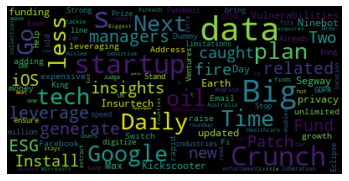

In [12]:
import json
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pprint



def rugrats():
    print("Here is one fo fun ")

#https://stackoverflow.com/questions/43954114/python-wordcloud-repetitve-words

    wordString = """Hey witch doctor, give us the magic words 
            All right, you go ooh ee ooh ah ah ting tang walla walla bing bang
            All right, you go ooh ee ooh ah ah ting tang walla walla bing bang 
            All right
            Ooh ee ooh ah ah ting tang walla walla bing bang
            Ooh ee ooh ah ah ting tang walla walla bang bang
            Ooh ee ooh ah ah ting tang walla walla bing bang
            Ooh ee ooh ah ah ting tang walla walla bang bang
            Doh, doh, doh, doh, doh, doh, doh"""
    wordcloud = WordCloud(collocations=False).generate(wordString)
    plt.imshow(wordcloud)


def accessAPI():
    #https://www.datacareer.de/blog/accessing-the-news-api-in-python/
#my api key 
    secret = "21f729baab2a461ea03247c4a60f1128"

#define endpoint
    url = 'https://newsapi.org/v2/everything?'


# Specify the query and number of returns
    parameters = {
        'q': 'big data', # query phrase
        'pageSize': 20,  # maximum is 100
        'apiKey': secret # your own API key
    }

#make the requests package 
    response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
    response_json = response.json()
    #pprint.pprint(response_json)

    #for i in response_json['articles']:
        #print(i['title'])
    
# Create an empty string
    text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
    for i in response_json['articles']:
        text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
    #print(text_combined[0:300])    

    wordcloud = WordCloud(max_font_size=40).generate(text_combined)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#https://www.geeksforgeeks.org/optimal-binary-search-tree-dp-24/
def optCost(freq, i, j):
      
    # Base cases 
    if j < i:     # no elements in this subarray 
        return 0
    if j == i:     # one element in this subarray 
        return freq[i] 
      
    # Get sum of freq[i], freq[i+1], ... freq[j] 
    fsum = Sum(freq, i, j) 
      
    # Initialize minimum value 
    Min = 999999999999
      
    # One by one consider all elements as 
    # root and recursively find cost of 
    # the BST, compare the cost with min
    # and update min if needed 
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j)) 
        if cost < Min: 
            Min = cost
      
    # Return minimum value 
    return Min + fsum
  
# The main function that calculates minimum 
# cost of a Binary Search Tree. It mainly 
# uses optCost() to find the optimal cost. 
def optimalSearchTree(keys, freq, n):
      
    # Here array keys[] is assumed to be 
    # sorted in increasing order. If keys[] 
    # is not sorted, then add code to sort  
    # keys, and rearrange freq[] accordingly. 
    return optCost(freq, 0, n - 1)
  
# A utility function to get sum of
# array elements freq[i] to freq[j] 
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k] 
    return s

def main():
    keys = [10, 12, 20] 
    freq = [34, 8, 50] 
    n = len(keys) 
    print("Cost of Optimal BST is", 
           optimalSearchTree(keys, freq, n))
    
    rugrats()
    accessAPI()
    
main()    